# **TASK 4: Sentiment Analysis of Twitter Sentiment Dataset**
**Description:** The goal is to create a sentiment analysis model that accurately classifies text sentiment, offering insights into public opinion, customer feedback, and social media trends.

# Importing Libraries:

In [1]:
import pandas as pd
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.linear_model import SGDClassifier

# Data Loading:

In [2]:
df = pd.read_csv(r'C:\Users\iamsh\Downloads\Twitter_Data\Twitter_Data.csv')

In [3]:
df.shape

(162980, 2)

In [4]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [5]:
df.tail()

,clean_text,category
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0
162979,have you ever listen about like gurukul where ...,1.0


# Data Cleaning:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [7]:
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [8]:
df['clean_text'] = df['clean_text'].fillna('')

In [9]:
df['clean_text'] = df['clean_text'].astype(str)

# Sentiment Analysis Using TextBlob:

In [10]:
df['polarity'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

**Polarity into positive, negative, or neutral sentiments**

In [11]:
df['sentiment'] = df['polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

In [12]:
df['sentiment'].value_counts()

sentiment
Positive    72233
Neutral     55220
Negative    35527
Name: count, dtype: int64

# Feature Engineering:

In [13]:
stop_words = set(stopwords.words('english'))

**Text data into numerical features using TF-IDF**

In [14]:
tfidf = TfidfVectorizer(max_features=500, stop_words=list(stop_words))

In [15]:
x = tfidf.fit_transform(df['clean_text']).toarray()

**Map sentiment labels to numerical values**

In [16]:
y = df['sentiment'].map({'Positive': 1, 'Neutral': 0, 'Negative': -1})

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Machine Learning Models: Naive Bayes and SVM:

**Naive Bayes Classifier**

In [18]:
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)

MultinomialNB()

In [19]:
y_pred_nb = nb_model.predict(x_test)

In [20]:
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.653301018529881
              precision    recall  f1-score   support

          -1       0.84      0.29      0.43      7187
           0       0.65      0.66      0.66     11033
           1       0.63      0.83      0.72     14376

    accuracy                           0.65     32596
   macro avg       0.71      0.59      0.60     32596
weighted avg       0.68      0.65      0.63     32596



**Support Vector Machine (SVM) Classifier**

In [21]:
svm_model = SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3)
svm_model.fit(x_train, y_train)

SGDClassifier()

In [22]:
y_pred_svm = svm_model.predict(x_test)

In [23]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.7302736532089827
              precision    recall  f1-score   support

          -1       0.80      0.41      0.54      7187
           0       0.62      0.98      0.76     11033
           1       0.88      0.70      0.78     14376

    accuracy                           0.73     32596
   macro avg       0.77      0.70      0.69     32596
weighted avg       0.77      0.73      0.72     32596



# Data Visualization:

**Word Cloud Visualization**

In [24]:
# Generating a word cloud from the text data

text = ' '.join(df['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

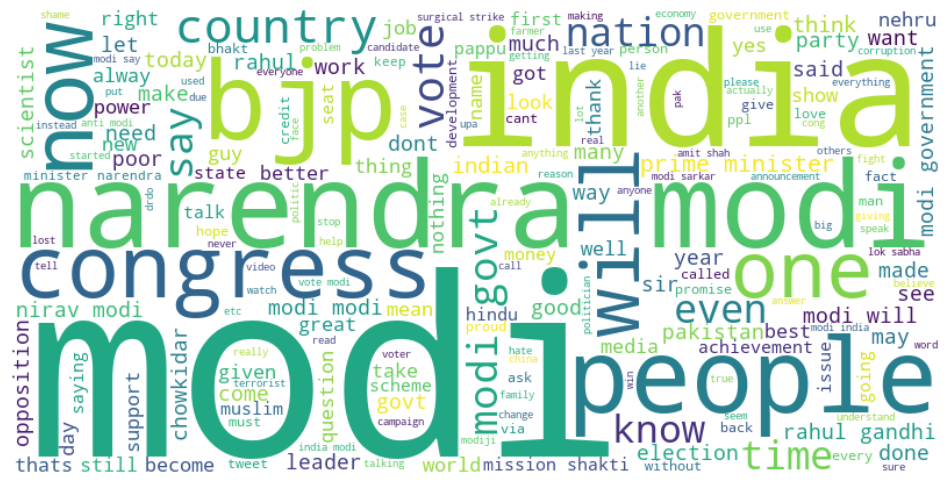

In [25]:
# Plotting the WordCloud

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Sentiment Distribution**

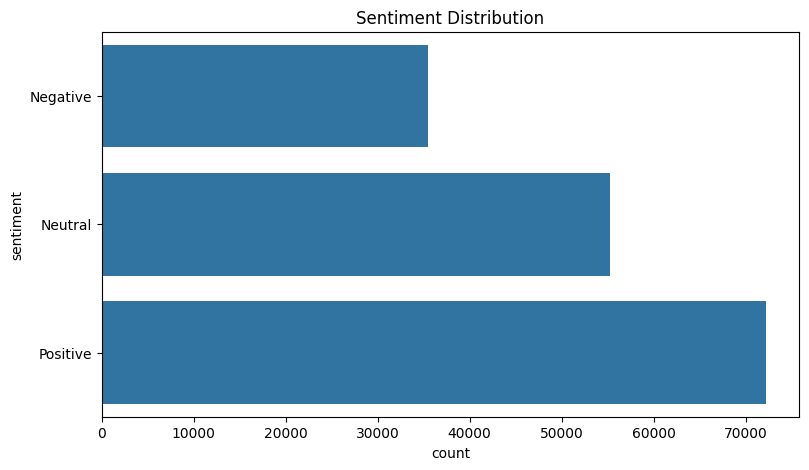

In [26]:
# sentiment distribution using a bar 

plt.figure(figsize=(9, 5))
sns.countplot(df['sentiment'])
plt.title("Sentiment Distribution")
plt.show()

**Model Performance Comparison**

In [27]:
models = ['Naive Bayes', 'SVM']
accuracies = [accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_svm)]

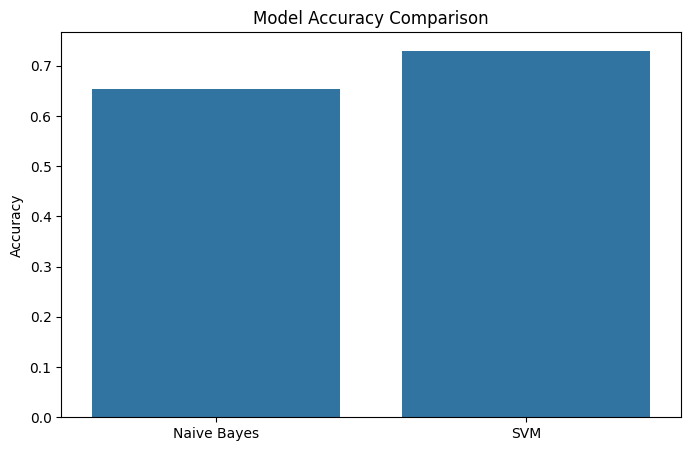

In [28]:
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()